<a href="https://colab.research.google.com/github/TonyQ2k3/pytorch-training/blob/main/notebooks/pytorch_day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Day 3

---

In [1]:
# Imports
import torch
from torch import nn
import matplotlib.pyplot as plt

## Model Testing Loop

In [2]:
# Model creation and train code
weight = 0.7
bias = 0.3
x = torch.arange(0, 1, 0.02, dtype=torch.float)
y = weight * x + bias

split_index = int(0.8 * len(x))
x_train, y_train = x[:split_index], y[:split_index]
x_test, y_test = x[split_index:], y[split_index:]

def plot_visual(
    train_data=x_train,
    train_labels=y_train,
    test_data=x_test,
    test_labels=y_test,
    predictions=None
):
  plt.figure((10, 7))
  plt.title("Dataset visualization")
  plt.scatter(x_train, y_train, s=4, c='b', label="Train")
  plt.scatter(x_test, y_test, s=4, c='g', label="Test")
  if predictions is not None:
    plt.scatter(x_test, predictions, s=4, c='r', label="Prediction")
  plt.legend(prop={"size": 4})
  plt.show()


class LinearRegressionModel(nn.Module):
    def __init__(self):
      super().__init__()
      self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
      self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
      return self.weight * x + self.bias



In [5]:
# Create model
torch.manual_seed(42)
model = LinearRegressionModel()

# Define LF, OP and EP
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)
epochs = 100

### Create loss map for visualization

For the testing loop, first we need to create some empty lists for storing useful values.

We then put the model into evaluation mode with `model.eval()`. The evaluation process is similar to that of training, except we calculate the loss between **the prediction labels and the test labels**

In [10]:
# Losses list
train_losses = []
test_losses = []
epoch_count = torch.arange(0, epochs, 10, dtype=torch.int)

In [11]:
# Train function
def train_model():
  for epoch in range(epochs):
    model.train()
    y_pred = model(x_train)
    loss = loss_fn(y_pred, y_train)


    if epoch % 10 == 0:
      # Add training loss to list
      train_losses.append(loss.item())
      print(f"Epoch: {epoch} | Loss: {loss}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Start training
train_model()

Epoch: 0 | Loss: 0.024458957836031914
Epoch: 10 | Loss: 0.021020207554101944
Epoch: 20 | Loss: 0.01758546568453312
Epoch: 30 | Loss: 0.014155393466353416
Epoch: 40 | Loss: 0.010716589167714119
Epoch: 50 | Loss: 0.0072835334576666355
Epoch: 60 | Loss: 0.0038517764769494534
Epoch: 70 | Loss: 0.008932482451200485
Epoch: 80 | Loss: 0.008932482451200485
Epoch: 90 | Loss: 0.008932482451200485


In [12]:
# Checking model params
print(model.state_dict())

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])


### Create validation set for evaluation

For evaluation, we need a new dataset, called the validation dataset

In [13]:
# Validation set
x_valid = torch.arange(1, 2, 0.05, dtype=torch.float)
y_valid = weight * x_valid + bias
print(x_valid)
print(y_valid)

tensor([1.0000, 1.0500, 1.1000, 1.1500, 1.2000, 1.2500, 1.3000, 1.3500, 1.4000,
        1.4500, 1.5000, 1.5500, 1.6000, 1.6500, 1.7000, 1.7500, 1.8000, 1.8500,
        1.9000, 1.9500])
tensor([1.0000, 1.0350, 1.0700, 1.1050, 1.1400, 1.1750, 1.2100, 1.2450, 1.2800,
        1.3150, 1.3500, 1.3850, 1.4200, 1.4550, 1.4900, 1.5250, 1.5600, 1.5950,
        1.6300, 1.6650])


In [14]:
# Eval function
def eval_model():
  model.eval()
  for epoch in range(epochs):
    with torch.inference_mode():
      valid_pred = model(x_valid)
      valid_loss = loss_fn(valid_pred, y_valid)
    if epoch % 10 == 0:
      test_losses.append(valid_loss.item())
      print(f"Epoch: {epoch} | Loss: {valid_loss}")


# Start evaluating
eval_model()

Epoch: 0 | Loss: 0.007880901917815208
Epoch: 10 | Loss: 0.007880901917815208
Epoch: 20 | Loss: 0.007880901917815208
Epoch: 30 | Loss: 0.007880901917815208
Epoch: 40 | Loss: 0.007880901917815208
Epoch: 50 | Loss: 0.007880901917815208
Epoch: 60 | Loss: 0.007880901917815208
Epoch: 70 | Loss: 0.007880901917815208
Epoch: 80 | Loss: 0.007880901917815208
Epoch: 90 | Loss: 0.007880901917815208


Define a function to visualize training losses and testing losses

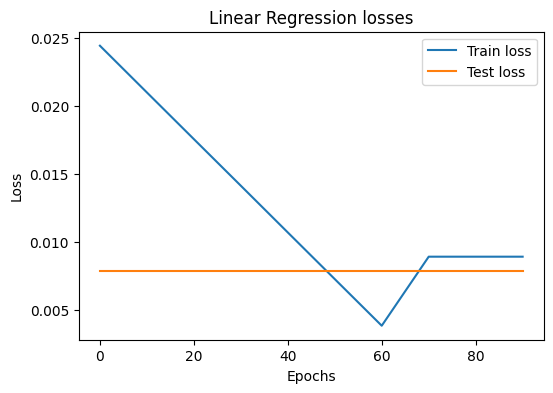

In [15]:
def loss_plot():
  plt.figure(figsize=(6, 4))
  plt.title("Linear Regression losses")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")

  # Train loss
  plt.plot(epoch_count, train_losses, label="Train loss")
  # Test loss
  plt.plot(epoch_count, test_losses, label="Test loss")

  plt.legend()
  plt.show()

loss_plot()

## Saving and Loading a model

In [16]:
# Preparation code
from pathlib import Path

# Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
print(f"Model save path: {MODEL_PATH}")

# Crearte model save path
MODEL_NAME = "linear_regression_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Model save path: {MODEL_SAVE_PATH}")

Model save path: models
Model save path: models/linear_regression_model.pth


### Save a model


To save a model, there're 2 methods:
1. `torch.save(model)` to save the entire model architecture, including the params and the training state.
2. `torch.save(model.state_dict())` to save only the model's learned parameters, without its entire architecture. This is useful if we want to use the pre-trained model params in a different architecture.

In [ ]:
# Save entire model
torch.save(model, "model.pth")

In [ ]:
# Save only the model params
torch.save(model.state_dict(), "model_params.pth")

### Load a model

To load a model, there're also 2 methods:
1. `torch.load()` to load a full model
2. `model.load_state_dict(torch.load())` to load the model params and put them in a new model

In [ ]:
# Load entire model
torch.load("model.pth")

In [ ]:
# Load model params
another_model = LinearRegressionModel()
another_model.load_state_dict(torch.load("model_params.pth"))

### Saving and loading

In [17]:
# Saving our model's parameters
print(f"Saving model params as {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), f=MODEL_SAVE_PATH)

Saving model params as models/linear_regression_model.pth


In [20]:
# Loading model paramters into a new model
another_model = LinearRegressionModel()
another_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

print(f"New model state dict:\n{another_model.state_dict()}")

New model state dict:
OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])
